In [144]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

## SmartPCA output files
* evec: position of each individual along eigenvectors
* eval: the ordered eigenvalues corresponding to the eigenvectors

In [145]:
def load_evec_file(smartPCA_evec_file):
    """ Loads the evec file from the smartPCA output, which contains the 
    principal component coordinates. """
    col_names = ["Name", "PC1", "PC2", "PC3", "PC4", "Population"]
    df_pca = pd.read_csv(smartPCA_evec_file, 
                         delim_whitespace=True, 
                         header=0, 
                         names=col_names)
    return df_pca

In [146]:
def load_eval_file(smartPCA_eval_file):
    """ Loads the eval file from the smartPCA output, which contains the 
    ordered eigenvalues corresponding to the eigenvectors. """
    df_eigenvalues = pd.read_csv(smartPCA_eval_file, 
                                 header=0, 
                                 names=["Eigenvalue"])
    df_eigenvalues.insert(0, 'PC', range(1, 1 + len(df_eigenvalues)))
    return df_eigenvalues

In [147]:
smartPCA_evec_file = "output/smartPCA/eurasia.evec"
df_pca = load_evec_file(smartPCA_evec_file)
df_pca

,Name,PC1,PC2,PC3,PC4,Population
0,SA1004,0.0149,-0.0765,0.2736,-0.1181,Khomani
1,SA063,0.0156,-0.0825,0.2974,-0.1281,Khomani
2,SA010,0.0159,-0.0860,0.3150,-0.1331,Khomani
3,SA064,0.0150,-0.0701,0.2454,-0.1029,Khomani
4,SA073,0.0140,-0.0754,0.2704,-0.1112,Khomani
...,...,...,...,...,...,...
2591,HG005-seqtk_adna_trim-96-5,-0.0426,-0.0406,-0.0114,0.0089,HG005-seqtk_adna_trim-96
2592,HG005-seqtk_adna_trim-96-6,-0.0423,-0.0405,-0.0114,0.0093,HG005-seqtk_adna_trim-96
2593,HG005-seqtk_adna_trim-96-7,-0.0424,-0.0406,-0.0118,0.0102,HG005-seqtk_adna_trim-96
2594,HG005-seqtk_adna_trim-96-8,-0.0422,-0.0399,-0.0114,0.0096,HG005-seqtk_adna_trim-96


In [148]:
smartPCA_eval_file = "output/smartPCA/eurasia.eval"
df_eigenvalues = load_eval_file(smartPCA_eval_file)
df_eigenvalues

,PC,Eigenvalue
0,1,10.242357
1,2,6.395703
2,3,4.365875
3,4,4.287704
4,5,2.530366
...,...,...
1308,1309,0.450032
1309,1310,0.416702
1310,1311,0.412872
1311,1312,0.373895


## Plot explained variance

In [177]:
def _variance_explained(df_eigenvalues, princ_comp):
    """ Calculates how much variance is explained by a principal component """
    PC_eig = int(df_eigenvalues[df_eigenvalues.PC == princ_comp]["Eigenvalue"])
    sum_eig = df_eigenvalues["Eigenvalue"].sum()
    PC_variance = round(PC_eig / sum_eig * 100, 2)
    return PC_variance


def add_explained_variance_column(df_eig):
    sum_eig = df_eigenvalues["Eigenvalue"].sum()
    df_eig = df_eig.assign(exp_variance=lambda x: x.Eigenvalue/sum_eig*100)
    return df_eig

In [178]:
df_eigenvalues = add_explained_variance_column(df_eigenvalues)
df_eigenvalues

,PC,Eigenvalue,exp_variance,cum_sum_var
0,1,10.242357,0.824184,0.824184
1,2,6.395703,0.514651,1.338835
2,3,4.365875,0.351314,1.690149
3,4,4.287704,0.345024,2.035173
4,5,2.530366,0.203614,2.238787
...,...,...,...,...
1308,1309,0.450032,0.036213,99.903159
1309,1310,0.416702,0.033531,99.936690
1310,1311,0.412872,0.033223,99.969913
1311,1312,0.373895,0.030087,100.000000


In [182]:
def plot_explained_variance(df_eigenvalues, num_pc):
    
    # Plot only num_pc amount of principal components
    df_eig = df_eigenvalues[:num_pc]
    
    plt.figure(figsize=(15, 5))
    plt.bar(df_eig.PC, 
            df_eig.exp_variance, 
            alpha=0.5, 
            label='Individual explained variance')
#     plt.step(df_eig.PC, 
#              df_eig.cum_sum_var, 
#              where='mid',
#              label='Cumulative explained variance')

    
    PC1_variance = _variance_explained(df_eig, princ_comp=1)
    PC2_variance = _variance_explained(df_eig, princ_comp=2)
    plt.xlabel(f"PC1 (variance explained: {PC1_variance}%)")
    plt.ylabel(f"PC2 (variance explained: {PC2_variance}%)")
    
    ax = plt.gca()
    ax.set_xlim(0, num_pc+1)

    plt.ylabel('Explained variance [%]')
    plt.xlabel('Principal component')
    #plt.legend(loc='best')
    plt.tight_layout()
    plt.title(f"Explained variance (Total number of PCs: {len(df_eigenvalues)})")
    plt.show()

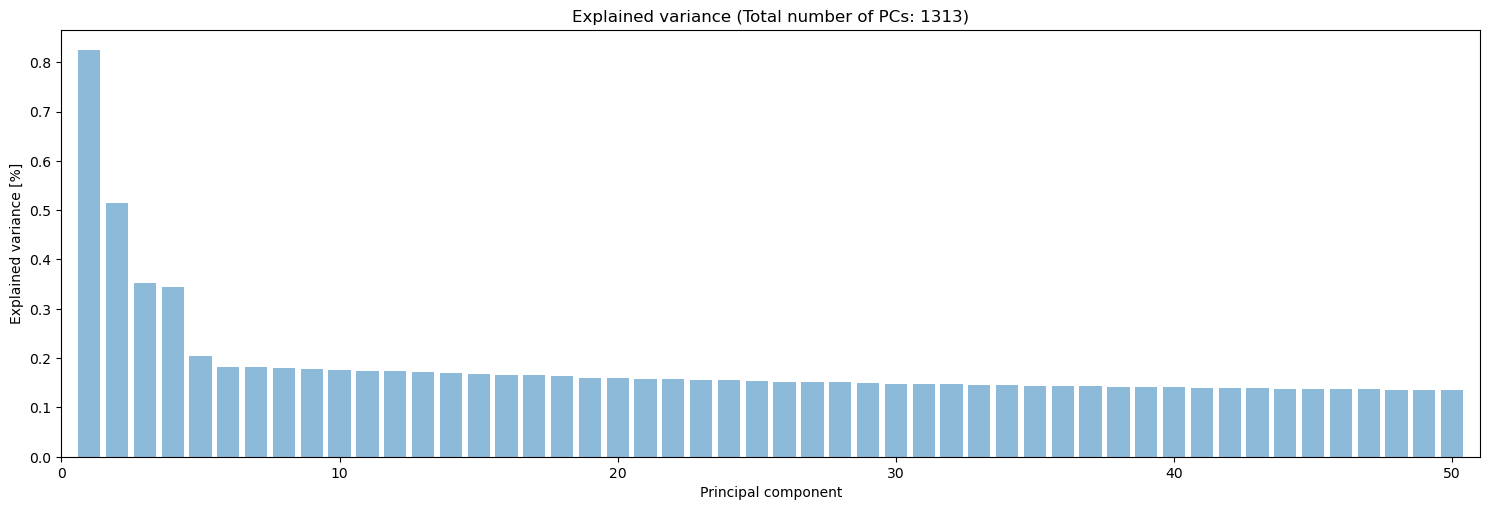

In [183]:
plot_explained_variance(df_eigenvalues, num_pc=50)

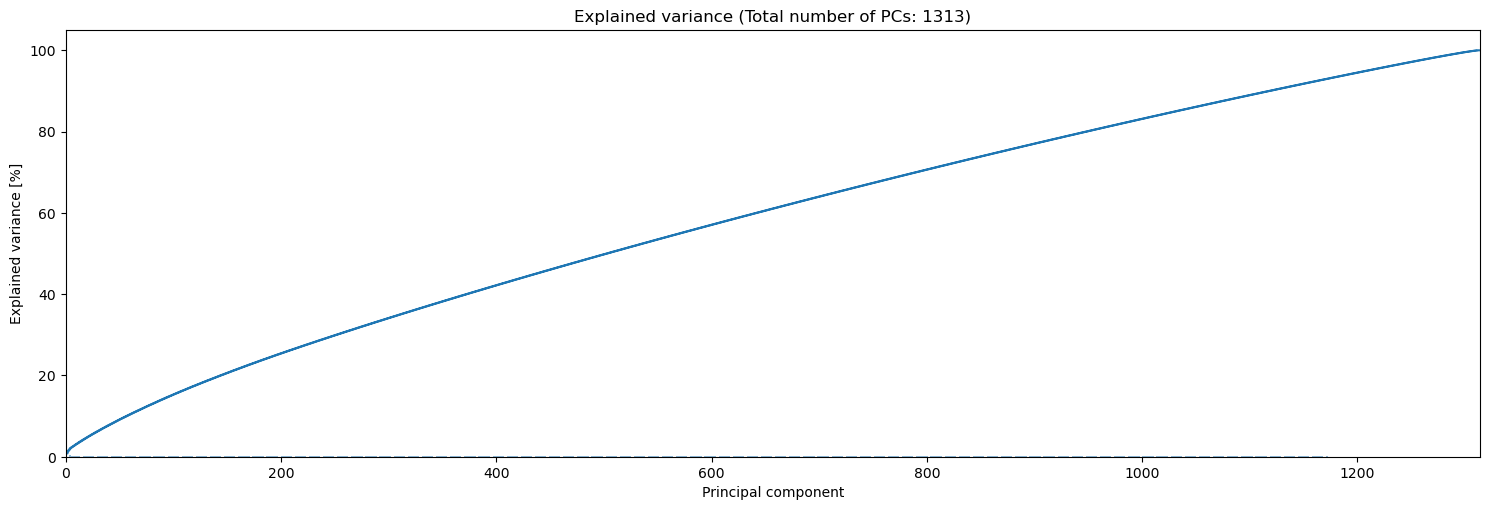

In [181]:
def plot_explained_variance(df_eigenvalues, num_pc):
    
    # Plot only num_pc amount of principal components
    df_eig = df_eigenvalues[:num_pc]

    
    plt.figure(figsize=(15, 5))
    plt.bar(df_eig.PC, 
            df_eig.exp_variance, 
            alpha=0.5, 
            label='Individual explained variance')
    
    import numpy as np
    df_eig = df_eig.assign(cum_sum_var=lambda x: np.cumsum(x.exp_variance))
    plt.step(df_eig.PC, 
             df_eig.cum_sum_var, 
             where='mid',
             label='Cumulative explained variance')

    
    PC1_variance = _variance_explained(df_eig, princ_comp=1)
    PC2_variance = _variance_explained(df_eig, princ_comp=2)
    plt.xlabel(f"PC1 (variance explained: {PC1_variance}%)")
    plt.ylabel(f"PC2 (variance explained: {PC2_variance}%)")
    
    ax = plt.gca()
    ax.set_xlim(0, num_pc+1)

    plt.ylabel('Explained variance [%]')
    plt.xlabel('Principal component')
    #plt.legend(loc='best')
    plt.tight_layout()
    plt.title(f"Explained variance (Total number of PCs: {len(df_eigenvalues)})")
    plt.show()
    
plot_explained_variance(df_eigenvalues, num_pc=len(df_eigenvalues))

## Plot PC1 against PC2

### Load the population data, add color and symbol indeces, if necessary

In [153]:
def load_eurasian_population_file(eurasian_population_tsv):
    """ Loads the evec file from the smartPCA output, which contains the 
    principal component coordinates. """
    col_names = ["Population", "color_index", "symbol_index"]
    df_eurasian_populations = pd.read_csv(eurasian_population_tsv, 
                                          names=col_names, 
                                          sep="\t")
    return df_eurasian_populations

In [154]:
# Open the file specifing which populations from the human orignss affymetrix
# should be plotted and which populations should be plotted in the same colour
eurasian_population_tsv = "input/smartPCA/poplists/eurasian_grouped.tsv"
df_eurasian_populations = load_eurasian_population_file(eurasian_population_tsv)
df_eurasian_populations

,Population,color_index,symbol_index
0,Finnish,0,0
1,Nganasan,0,1
2,Mansi,0,2
3,Hungarian,0,3
4,Estonian,0,4
...,...,...,...
107,Kalash,8,2
108,Kusunda,8,3
109,Punjabi,8,4
110,Sindhi,8,5


In [155]:
def get_HG_populations(sample_file):
    """ Reads the eigenstrat ind file to get the population names of the 
    samples from the fragmented HG002 and HG005 reads. Based on the population 
    name, columns for coverage depth, color_index, and symbol_index are added
    for plotting."""
    
    col_names = ["Name", "Sex", "Population"]
    df_sample = pd.read_csv(sample_file, sep="\s+", names=col_names)
    
    # remove the reference/giab samples
    df_sample = df_sample.loc[~df_sample['Name'].str.contains("giab")]
    
    # add columns to specify the trim/merging tool and the coverage depth
    cols = ["Sample", "Tool", "Fraction"]
    df_sample[cols] = df_sample["Population"].str.split("-", expand = True)
    fraction2depth = {"06":"0.25X", 
                      "12":"0.5X", 
                      "24":"1X", 
                      "48":"2X", 
                      "96":"4X",}
    df_sample["CovDepth"] = df_sample["Fraction"] \
                                .apply(lambda x: fraction2depth[x])

    # Add color and symbol indeces for plotting
    df_sample["color_index"] = df_sample["Sample"].factorize()[0]
    df_sample["symbol_index"] = df_sample["Tool"].factorize()[0]
    
    # Only take the columns and row that are specific for each population,
    # with all subsample seeds being in one population
    final_colums = ["Population", "Sample", "Tool", "CovDepth", "color_index", 
                    "symbol_index"]
    df_HG_populations = df_sample[final_colums] \
                            .drop_duplicates() \
                            .sort_values(by=["Sample", "Tool"])
    
    return df_HG_populations

In [156]:
HG_sample_file = "output/eigenstrat/HG002_HG005.ind"
df_HG_populations = get_HG_populations(HG_sample_file)

df_HG_populations

,Population,Sample,Tool,CovDepth,color_index,symbol_index
0,HG002-AdapterRemoval-06,HG002,AdapterRemoval,0.25X,0,0
10,HG002-AdapterRemoval-12,HG002,AdapterRemoval,0.5X,0,0
20,HG002-AdapterRemoval-24,HG002,AdapterRemoval,1X,0,0
30,HG002-AdapterRemoval-48,HG002,AdapterRemoval,2X,0,0
40,HG002-AdapterRemoval-96,HG002,AdapterRemoval,4X,0,0
...,...,...,...,...,...,...
652,HG005-seqtk_adna_trim-06,HG005,seqtk_adna_trim,0.25X,1,6
662,HG005-seqtk_adna_trim-12,HG005,seqtk_adna_trim,0.5X,1,6
672,HG005-seqtk_adna_trim-24,HG005,seqtk_adna_trim,1X,1,6
682,HG005-seqtk_adna_trim-48,HG005,seqtk_adna_trim,2X,1,6


### Plotting

In [176]:
def _plot_eurasian_populations(df_HO_populations, df_pca):
    """ Plot the eurasian populations from the Affymetrix Human Origins Array"""
    symbols = [".", "o", "v", "^", "<", ">", "D", "s", "*", "+", "x", "X", "P",
               "d", "1", "2", "3", "4", "p", "h", "$∗$",]
    colors = [u'#8dd3c7', 
              #u'#ffffb3', 
              u'#bebada', 
              u'#fb8072', 
              u'#80b1d3', 
              u'#fdb462',
              u'#b3de69', 
              u'#e5c494',
              #u'#d9d9d9', 
              u'#bc80bd', 
              #u'#ccebc5', 
              #u'#ffed6f',
              u'#fccde5']
    for index, row in df_HO_populations.iterrows():
        df = df_pca[df_pca.Population == row["Population"]]
        color = colors[row["color_index"]]
        marker = symbols[row["symbol_index"]]
        plt.plot(-df["PC1"], 
                 df["PC2"], 
                 color=color,
                 marker=marker,
                 fillstyle="none",
                 linestyle="none",
                 label=row["Population"]
                 )
    
    
def _plot_fragmented_reads(df_HG_populations, df_pca):
    """ Plot the samples HG002 and HG005 from the fragmented, trimmed and merged  
    HG002 and HG005 samples"""
    colors = ("saddlebrown", "dimgrey")
    symbols = ("^", "8", "s", "p", "P", "*", "h")
    for index, row in df_HG_populations.iterrows():
        df = df_pca[df_pca.Population == row["Population"]]
        color = colors[row["color_index"]]
        marker = symbols[row["symbol_index"]]
        label = f'{row["Sample"]}, {row["Tool"]}'
        plt.plot(-df["PC1"], df["PC2"], 
                 color=color,
                 marker=marker, 
                 #fillstyle="none",
                 linestyle="none",
                 label=label,
                 )
    
    
def _plot_reference_samples(df_pca):
    # Plot the reference/"true" variants of HG002 and HG005 samples
    df = df_pca[df_pca.Population == "HG002-giab"]
    plt.plot(-df["PC1"], df["PC2"], color="maroon", marker=".",
             linestyle="none", label="HG002, reference")
    df = df_pca[df_pca.Population == "HG005-giab"]
    plt.plot(-df["PC1"], df["PC2"], color="black", marker=".",
             linestyle="none", label="HG005, reference")

    # df = df_pca[df_pca.Population == "HG002_giab-all"]
    # plt.plot(-df["PC1"], df["PC2"], color="maroon", marker=".",
    #          linestyle="none", label="HG002, reference (all)",)
    # df = df_pca[df_pca.Population == "HG002_giab-benchmark"]
    # plt.plot(-df["PC1"], df["PC2"], color="black", marker=".",
    #          linestyle="none", label="HG002, reference (high conf.)")
    
    # df = df_pca[df_pca.Population == "HG005_giab-all"]
    # plt.plot(-df["PC1"], df["PC2"], color="maroon", marker=".",
    #          linestyle="none", label="HG005, reference (all)")
    # df = df_pca[df_pca.Population == "HG005_giab-benchmark"]
    # plt.plot(-df["PC1"], df["PC2"], color="black", marker=".",
    #          linestyle="none", label="HG005, reference (high conf.)")
    
    
def plot_pca(df_pca, df_eurasian_populations, df_HG_populations, 
             df_eigenvalues, cov_depth):
    """ flipping the x axis to make the correlation to Geography more obvious
    """
    plt.figure(figsize=(15, 15))
    
    _plot_eurasian_populations(df_eurasian_populations, df_pca)
    _plot_fragmented_reads(df_HG_populations, df_pca)
    _plot_reference_samples(df_pca)

    # ax = plt.gca()
    # ax.set_xlim(-0.06, 0.10)
    # ax.set_ylim(-0.06, 0.10)
    
    PC1_variance = float(df_eigenvalues[df_eigenvalues.PC==1]["exp_variance"])
    PC2_variance = float(df_eigenvalues[df_eigenvalues.PC==2]["exp_variance"])
    
    plt.xlabel(f"PC1 (variance explained: {round(PC1_variance,2)}%)")
    plt.ylabel(f"PC2 (variance explained: {round(PC2_variance,2)}%)")
    plt.legend(loc=(1.1, 0), ncol=3)
    plt.title(f"Coverage depth {cov_depth}")
    
    
def plot_pca_all_depths(df_pca, df_eurasian_populations, df_HG_populations, 
                        df_eigenvalues):
    """ Creates a PCA plot for each coverage depth (0.25X, 0.5X, 1X, 2X, 4X)"""
    for cov_depth in ["0.25X", "0.5X", "1X", "2X", "4X"]:
        cov_depth_mask = df_HG_populations["CovDepth"] == cov_depth
        df_HG_populations_one_depth = df_HG_populations[cov_depth_mask]
        plot_pca(df_pca, 
                df_eurasian_populations, 
                df_HG_populations_one_depth, 
                df_eigenvalues,
                cov_depth)

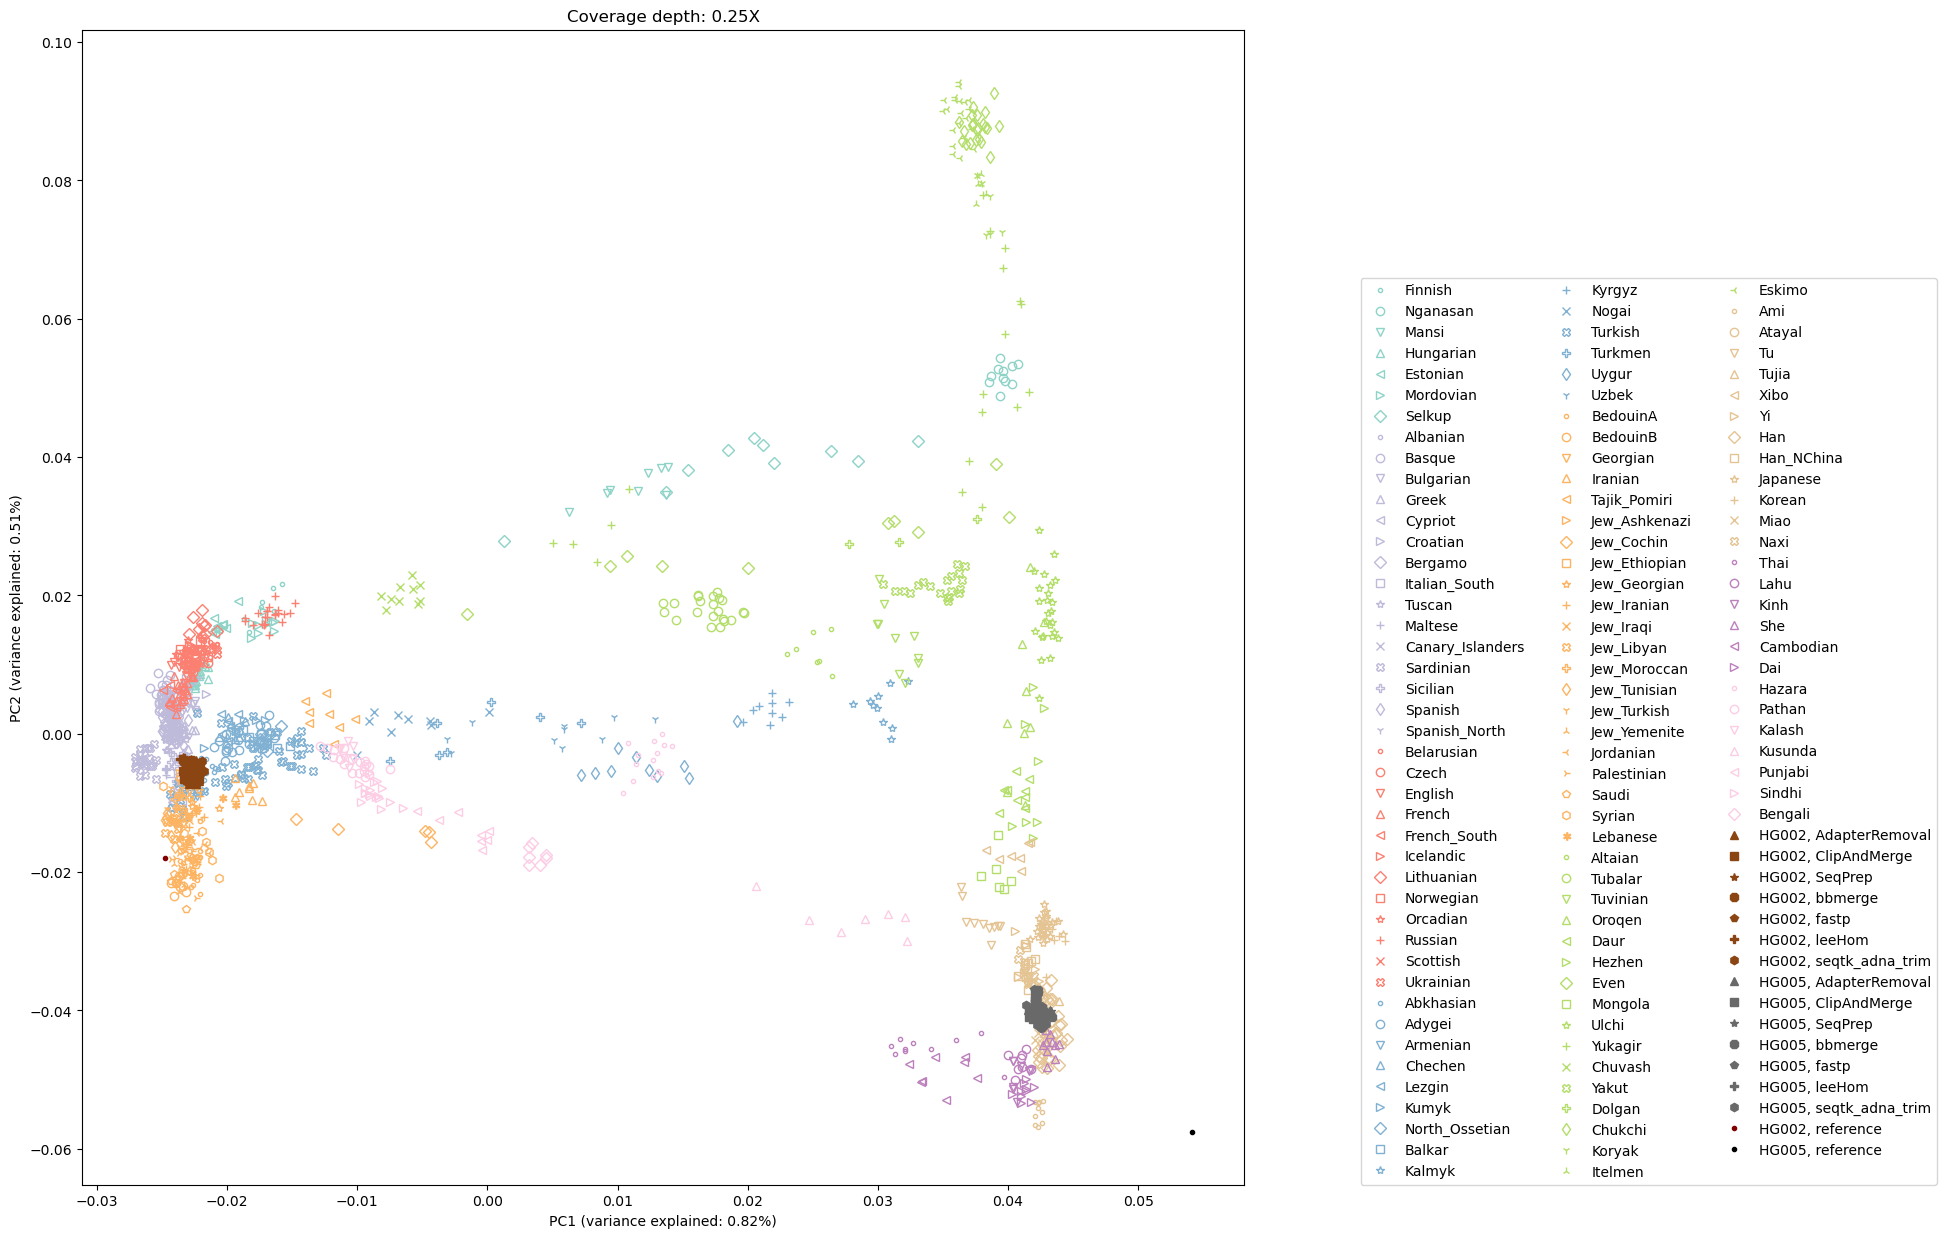

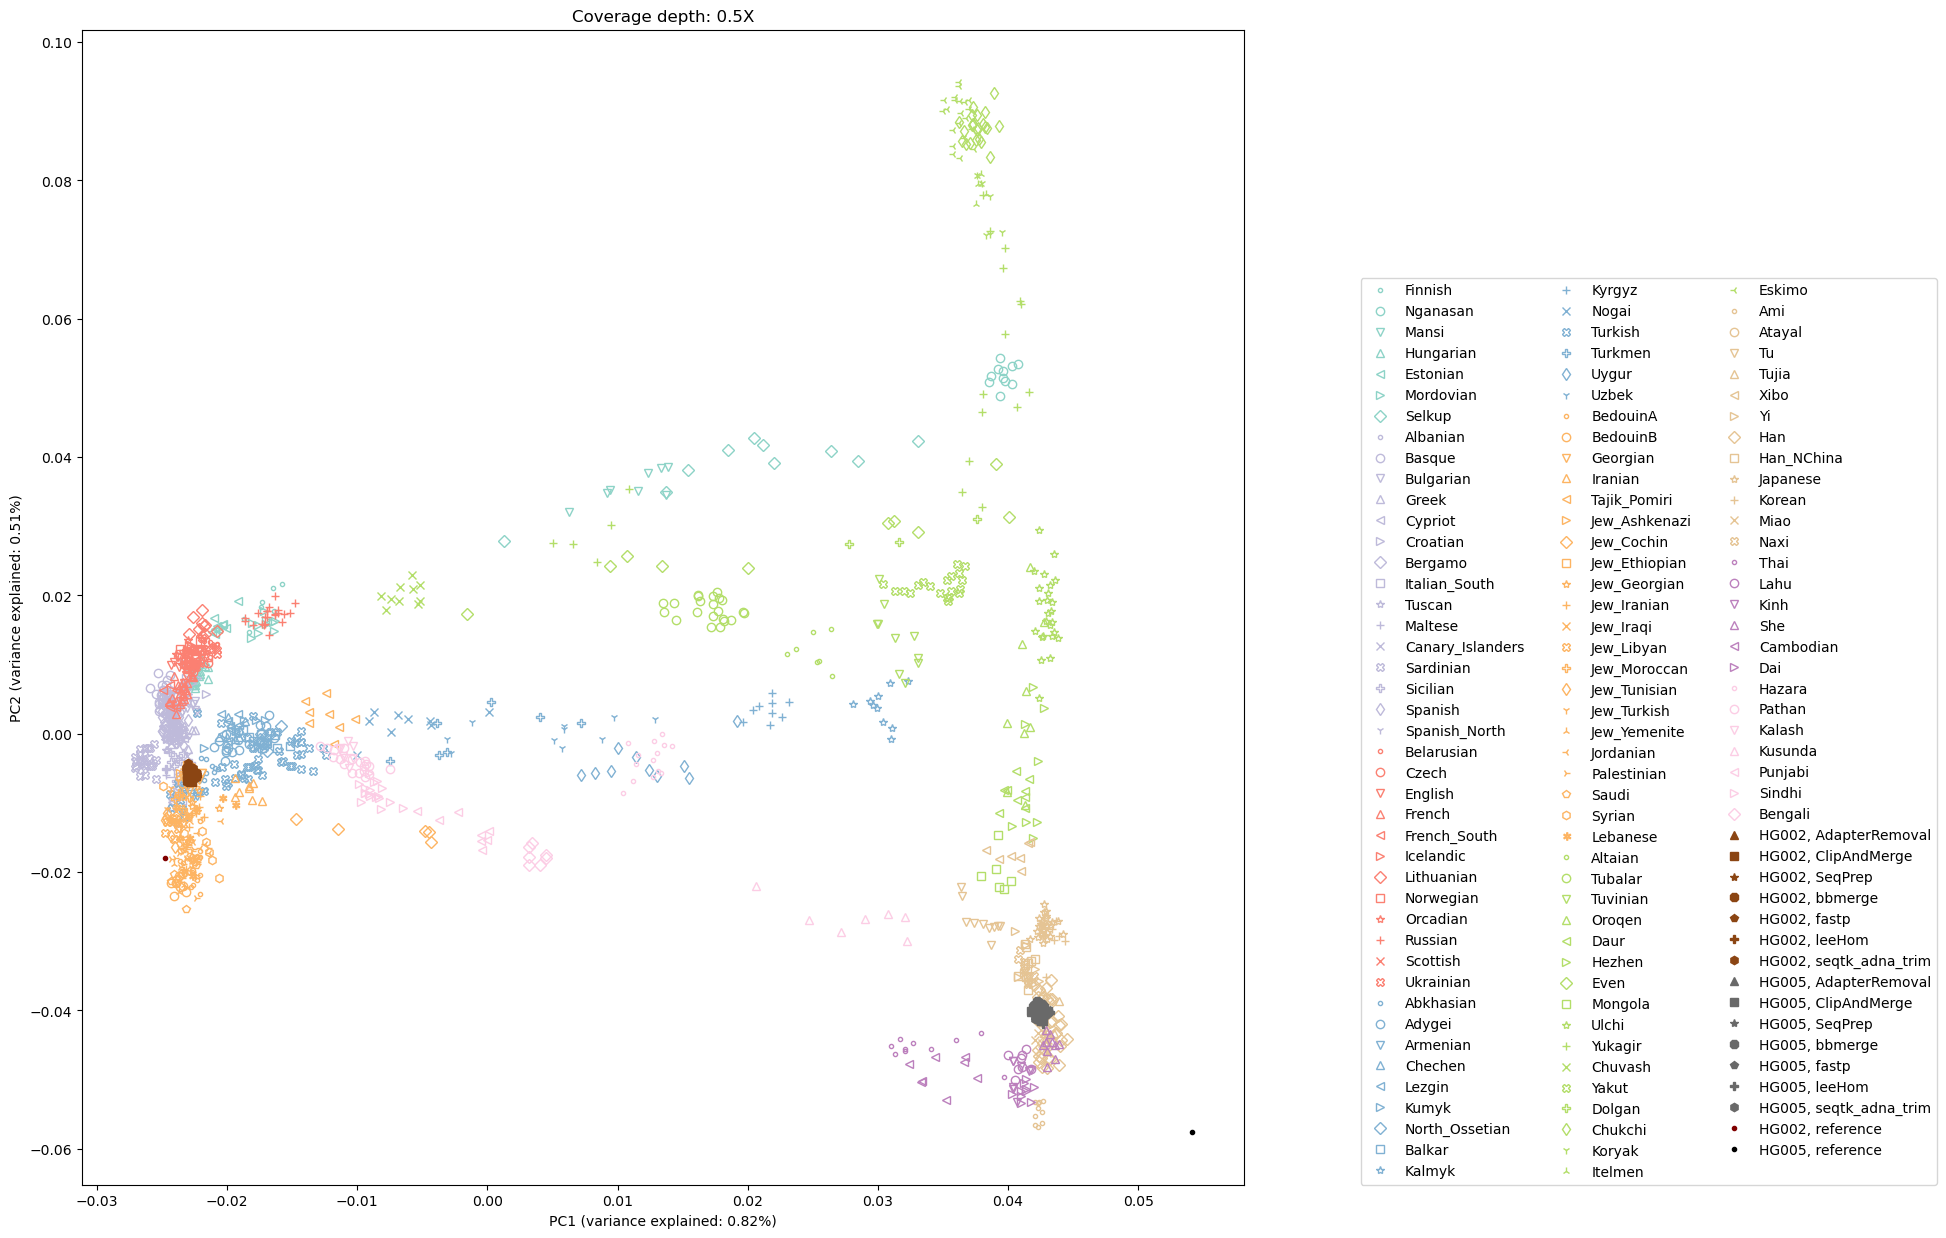

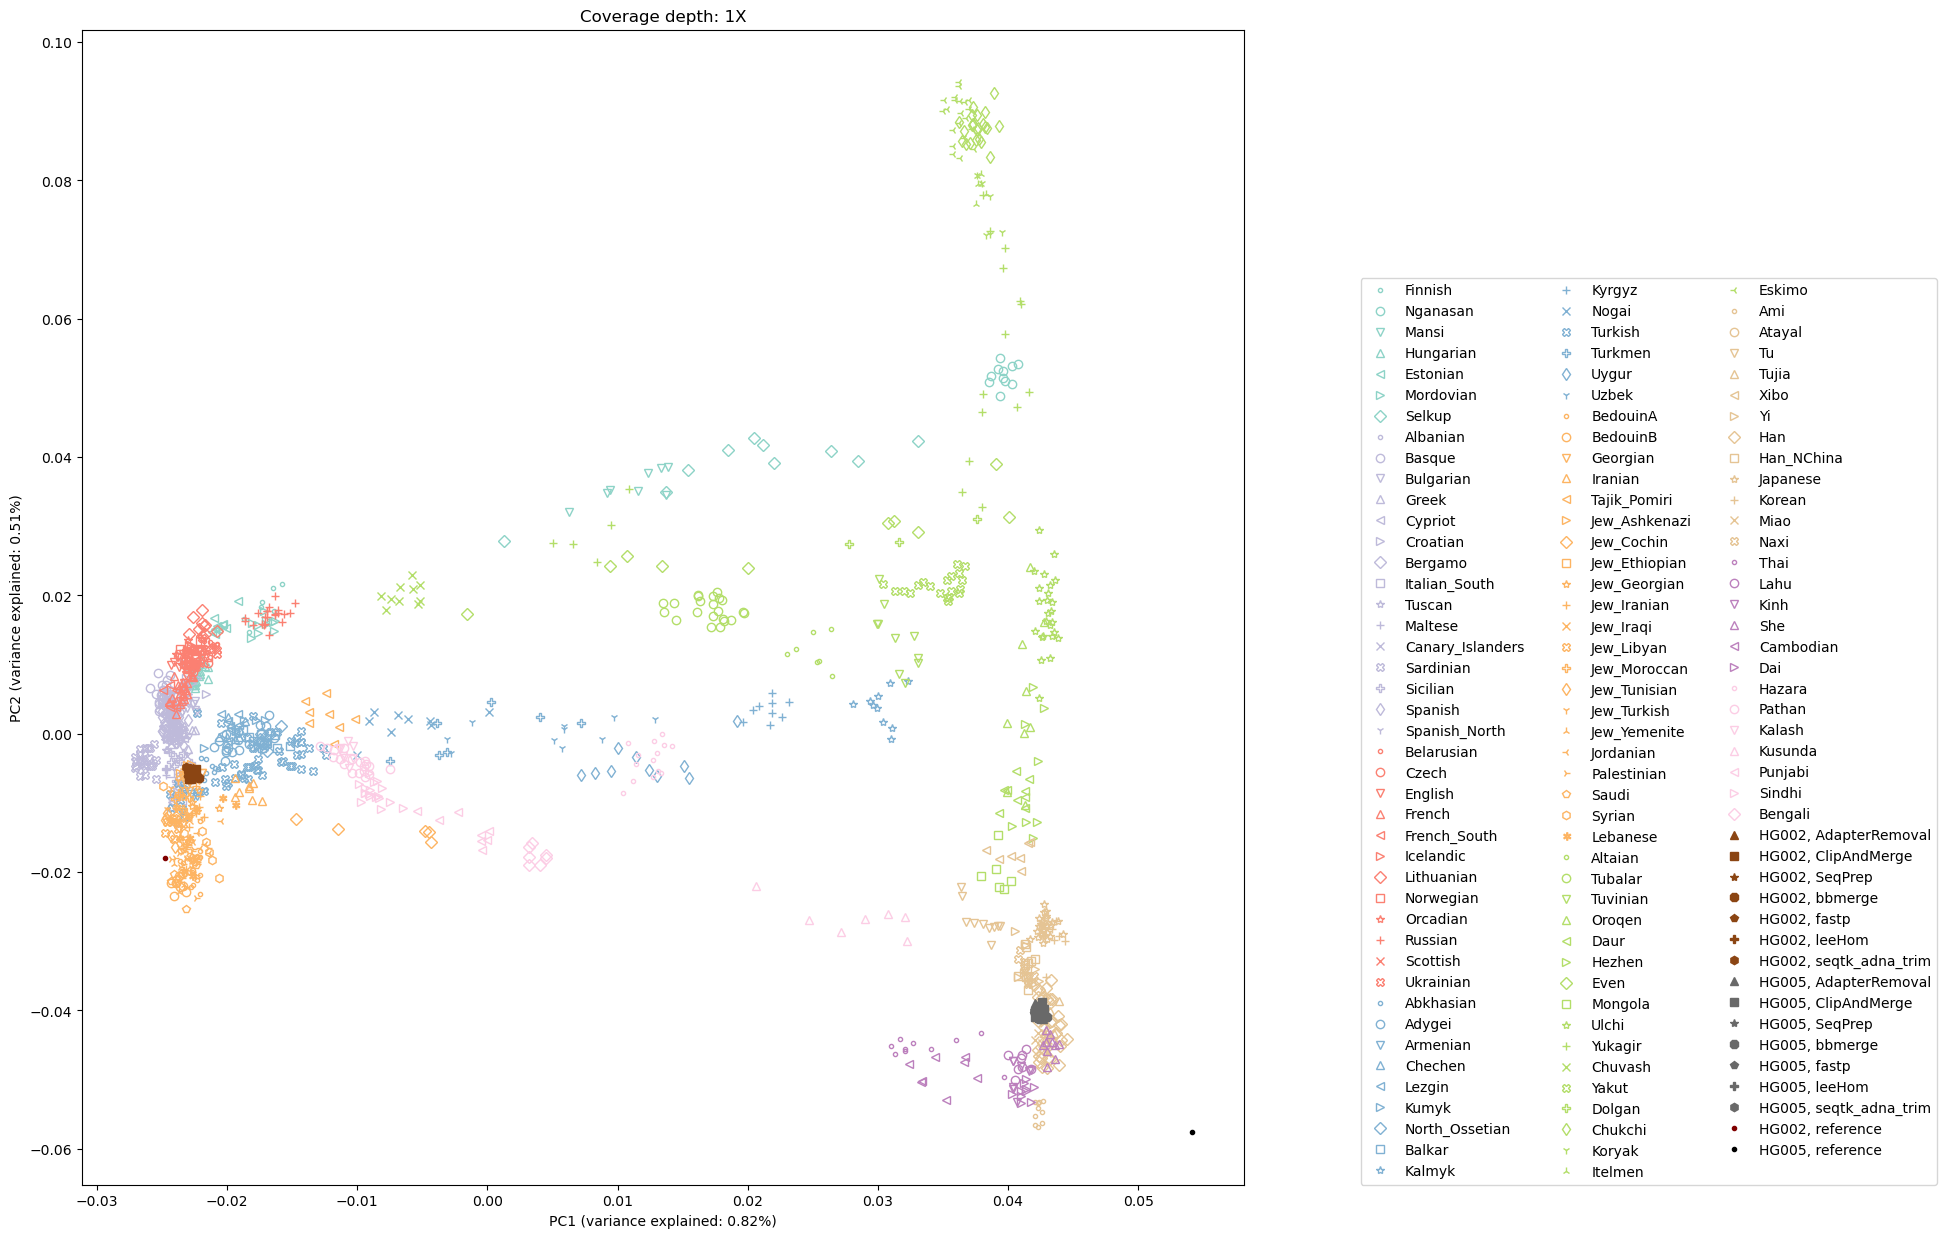

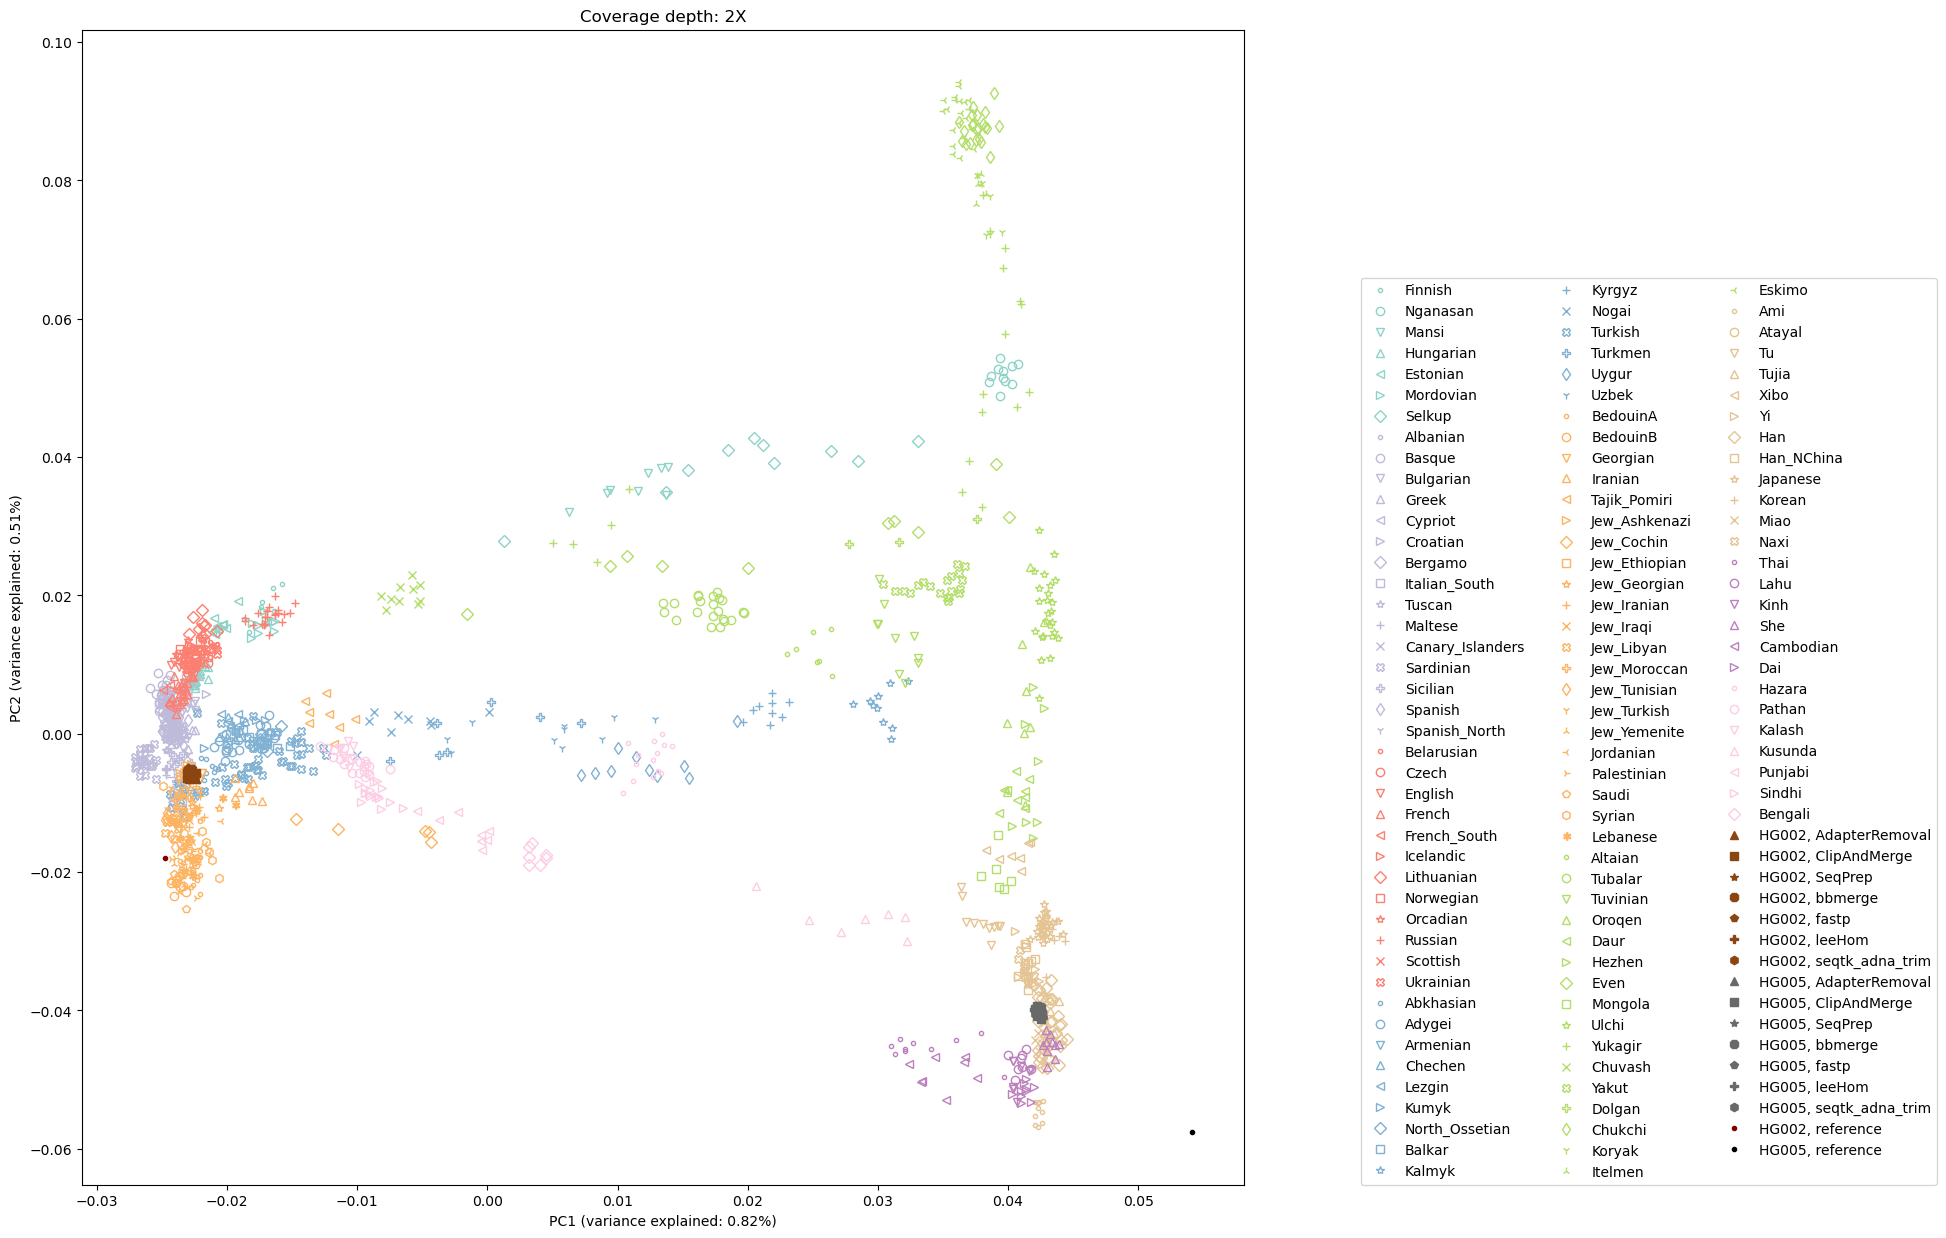

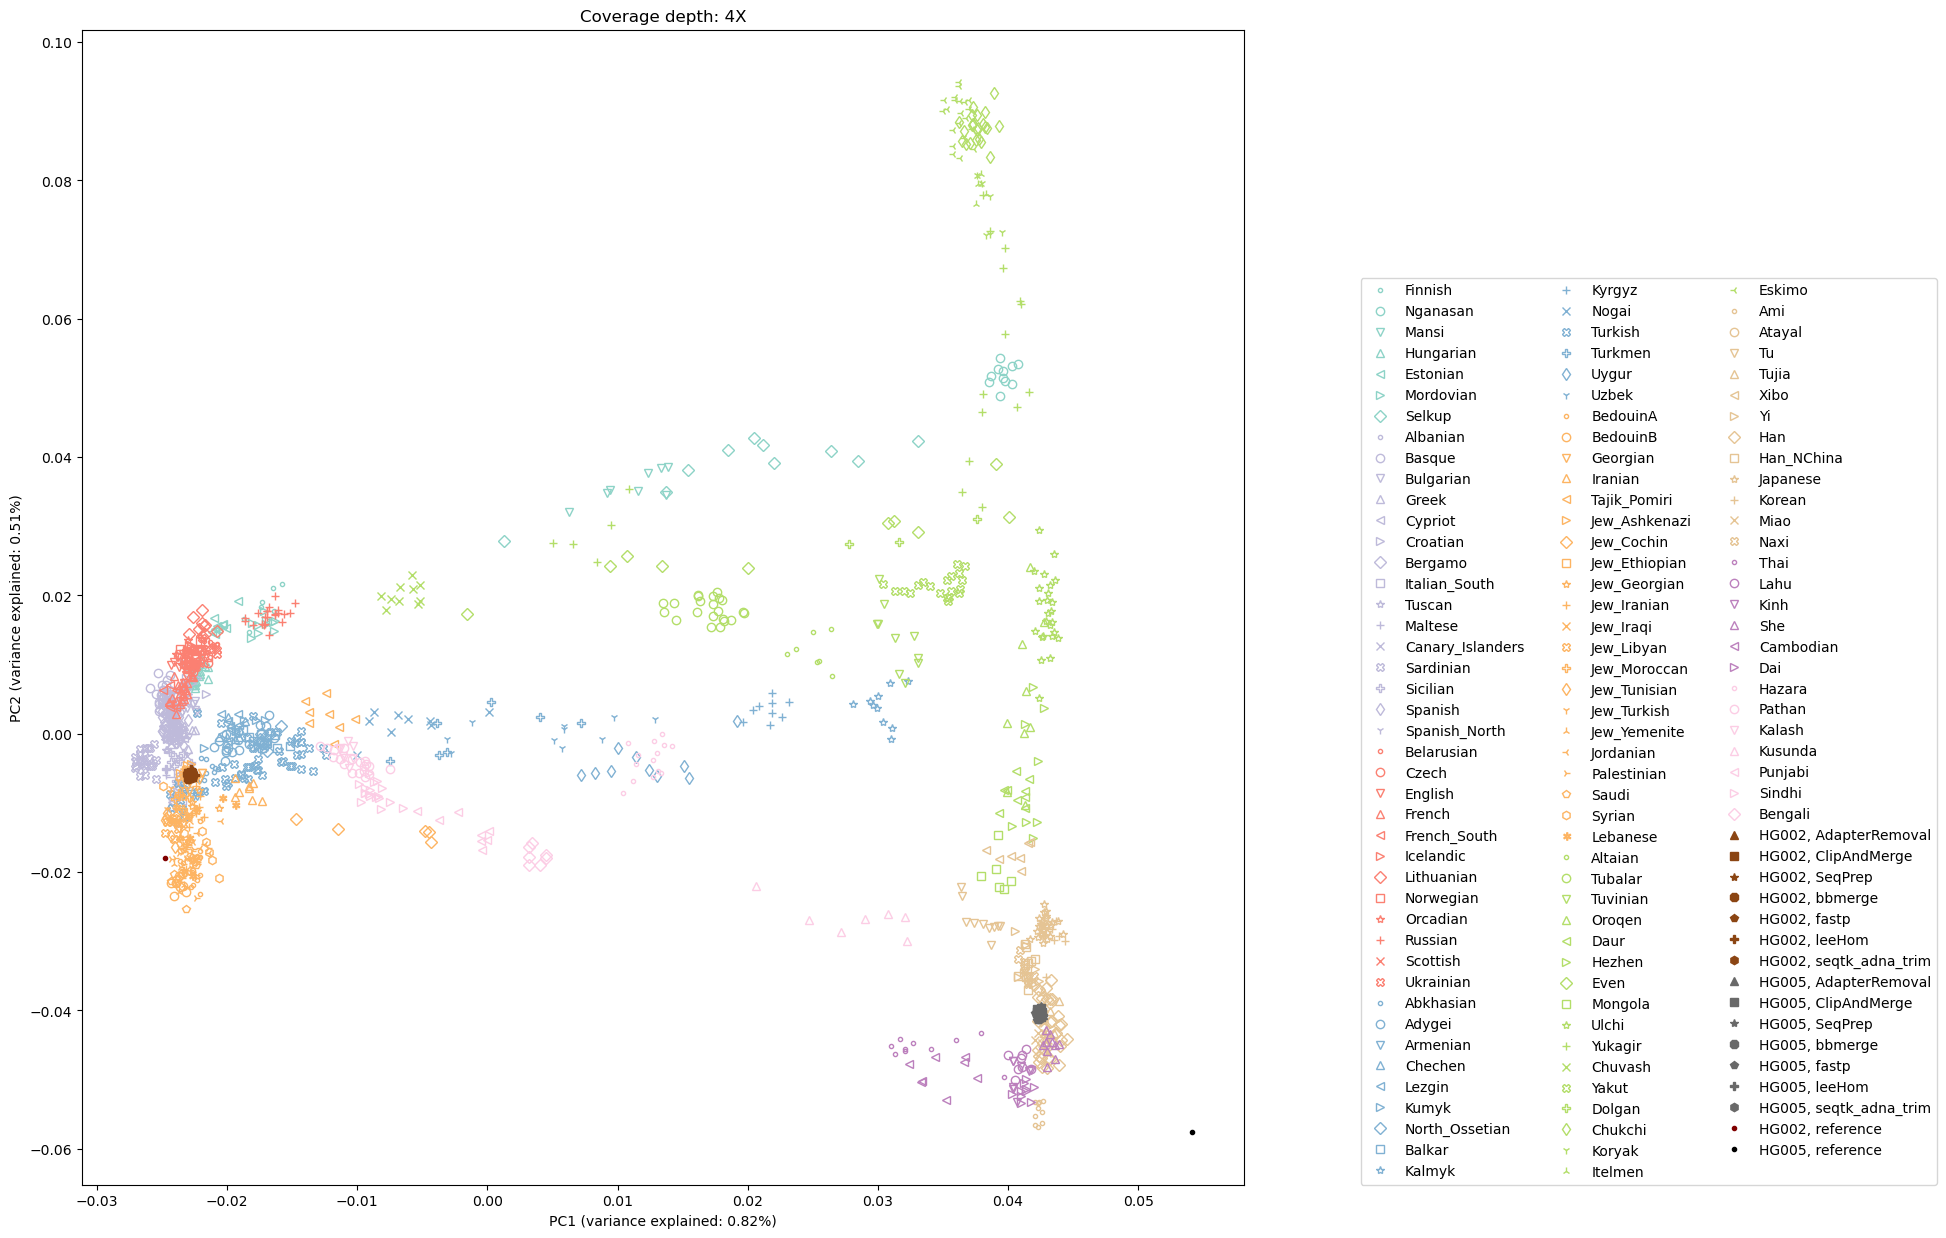

In [175]:
plot_pca_all_depths(df_pca, df_eurasian_populations, df_HG_populations,
                    df_eigenvalues)

# Get hex values of matplot color maps

#8dd3c7
#ffffb3
#bebada
#fb8072
#80b1d3
#fdb462
#b3de69
#fccde5
#d9d9d9
#bc80bd
#ccebc5
#ffed6f


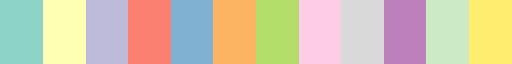

In [159]:
cmaps = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']
import matplotlib as mpl

from pylab import *

cmap = mpl.colormaps["Set3"]

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

mpl.colormaps["Set3"]

#66c2a5
#fc8d62
#8da0cb
#e78ac3
#a6d854
#ffd92f
#e5c494
#b3b3b3


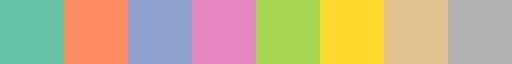

In [160]:
cmap = mpl.colormaps["Set2"]

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

mpl.colormaps["Set2"]